<a href="https://colab.research.google.com/github/muksung0084/mook_Repository/blob/master/20201214simple_marketing_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D__linear_%5Bols%2Csklearn%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 간단한 선형회귀 분석 실시 

### > 데이터 확인 - collab에 마운팅
### > 결측값 확인 
### > corr() , heatmap을 통한 대략적인 상관관계 비교 
### > scatter, pairplot등을 통해서 각 독립변수와 종속변수 상관도 시각화표현
### > distplot 정규분포성 파악 
### > log()화를 통한 정규분포곡선에 가깝게 데이터 변형 조정 
### > labels : 종속 , features : 독립 변수설정을 통한 model 설정 준비 
### > ols , sklearn을 통한 선형회귀 분석 
### > coef, p-value , r-square , 회귀식 도출을 통해 시나리오별 모델성능 파악 
### > predict를 이용 회귀식으로 예상값 도출 
### > 예상 방향 설정 

### marketing data로 regression practice

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from google.colab import files 
uploaded = files.upload()

Saving Advertising.csv to Advertising.csv


In [ ]:
# 데이터 확인 uploaded 
raw_data = pd.read_csv("Advertising.csv")
print(raw_data.shape)  # 습관화 하는게 좋음. 
raw_data.tail()

(200, 5)


,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [ ]:
# 결측값 확인하기 
raw_data.info()
print('\n',raw_data.isnull().sum())
raw_data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB

 Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64


Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [ ]:
df = raw_data[['TV', 'radio', 'newspaper', 'sales']]
print(df.shape)

(200, 4)


In [ ]:
# 기술통계 확인 
df.describe()
# std 표준편차 


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
# 변수간의 correlation 파악 - 높을수록 유사.  --> 단순 수치값으로 표현 
corr = df.corr()

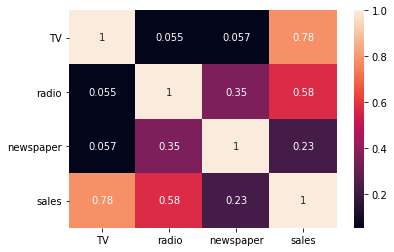

In [ ]:
# 변수가 많을경우 숫자가 한눈에 들어오지 않을때 --> 시각화를 이용 
sns.heatmap(corr,annot=True) # annot는 레이블

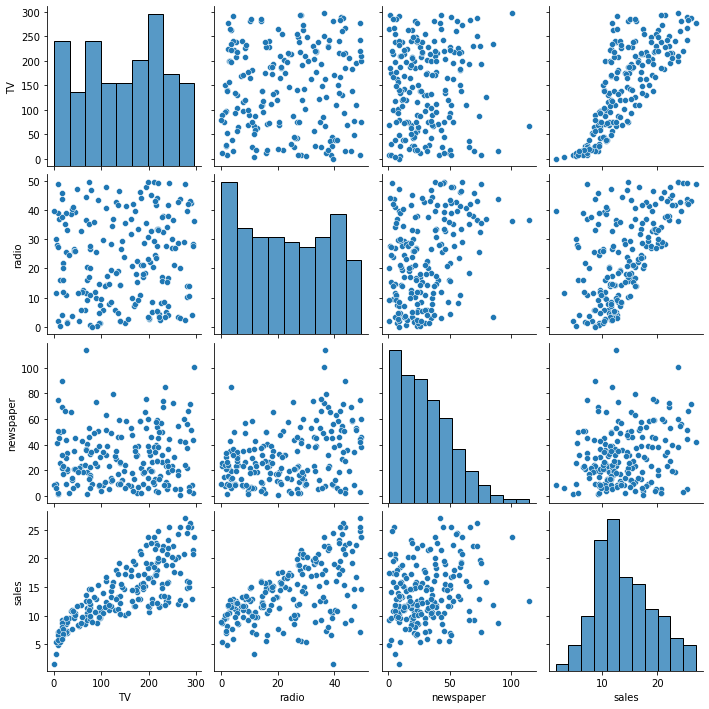

In [ ]:
# 변수간의 pairplot 그리기 
sns.pairplot(df)
plt.show()

In [ ]:
# labels(종속변수) 와 features(독립변수) 로 y값 x값을 지정해준다 . 
labels = df['sales']  # y값이라고 생각해 --> output 변수
features = df[['TV', 'radio', 'newspaper']]   # x값  -->input 변수

## 데이터 분석


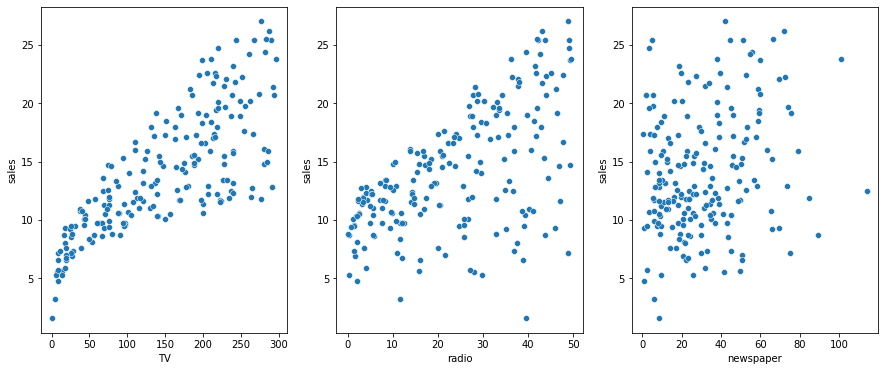

In [ ]:
# 시각화로 대략적인 상관관계 파악 다시해보기 -- 짐작해봄 
# scatter plot으로 

# 한행에 3개의 열로 그래프 나타내기 
figure, ((ax1,ax2,ax3)) = plt.subplots(nrows=1,ncols=3)

# size조절  - inche로
figure.set_size_inches(15,6)
sns.scatterplot(data = df , x='TV',y='sales',ax = ax1)
sns.scatterplot(data = df , x='radio',y='sales',ax=ax2)
sns.scatterplot(data = df , x='newspaper',y='sales',ax=ax3)

In [ ]:
# 선형회귀 분석 실시 stats model 

import statsmodels.formula.api as sm 

model1 = sm.ols(formula = "sales ~ TV + radio + newspaper",data= df).fit()  # 종속변수 입력 ~ 독립변수들 + + +   입력후 fit하면 분석됨 

print(model1.summary()) # 분석된 결과 보기 summary함수

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           1.58e-96
Time:                        13:11:21   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

## 분석결과 해석하기 

>> 잘된 분석인건가? 파악하는 법 

관심있게 보아야할 부분 

* **R-squared** : 높을수록 좋음  (0.4 ~ 6 정도 수준이어도 현실 데이터상에선 좋은 수준)
* **coef 값** : 상관계수 --> 독립변수가 종속변수에 얼마나 영향을 미치는지를 
보여주는 상대값. 

--> 이를 통해서 효율을 알 수 있음, 계수가 클 수록 독립변수값에 따라 y값이 크게 변화할태니  
   **따라서 결과를 보게되면 TV가 비용대비 효율은 좀 떨어진다** 라고 예측할 수 있겠다
* **p>[t]** : 변수들이 의미가 있는가? sales와  -->  p value값을 봐야함.    
 **0.05** 수준에서 기준//이거보다 작으면 좋은것, 
    --> 즉 이 변수는 유의미 한 것이다.
    해당 데이터 해석중 신문광고가 매출액에 미치는 영향은 유의 하지 않다. 

* **intercept** --> y절편 . 
* **회귀식으로 표현** 하자면, sales = 2.0989 + 0.0458TV + 0.1885radio - 0.001newspapaer 

   그런데 신문은 유의하지 않다고 p_value가 말하니까 .. 알아서 걸르면 됨.


## sklearn을 통한 회귀분석 

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
model2 = LinearRegression().fit(features,labels)
print(model2.intercept_,model2.coef_)

2.938889369459412 [ 0.04576465  0.18853002 -0.00103749]


## 변수의 포함 여부에 따른 ols 분석 결과 비교 
### feautres 모두 포함한것, 하나씩 뺀거 

>> 모델을 선택을 할때, 다양한 시나리오를 만들어 그려본 후 가장 성능이 좋은 모델을 가져가기 위해.

         --> 당연히 변수가 많을 수록 다양한 시나리오가 나오겠지. 

In [ ]:
modela = sm.ols(formula = "sales ~ TV + radio + newspaper",data= df).fit()
modelb = sm.ols(formula = "sales ~ TV + radio ",data= df).fit()
modelc = sm.ols(formula = "sales ~ TV + newspaper",data= df).fit()
print(modela.summary())
print(modelb.summary())
print(modelc.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           1.58e-96
Time:                        13:31:33   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

## 여러 시나리오중 어느것을 골라야 하는가? 과거 데이터를 통해서
AIC, BIC,  값에 주목 

model a,b,c에서 해당 값이 가장 낮은 모델이 우선순위가 됨.  
그리고 이후 r_square, p value 파악 /


신문은 계속 무의하네! 이를 통해 신문은 굳이 계속해서 광고를 실을 필요는 없겠다. 

## 그럼 지금까진 200개월 데이턴데 이를 통해서 ,,  나중에는 어떻게 어디에 광고를 실으면 좋을까. 
predict가 필요 

우리가 알아낸 모델의 회귀식을 통해 값을 넣고, 이를 통해서 예측을 실시한다.  

 input 변수에 우리가 추청치를 넣으며, 그에 해당하는 sales값이 예측 되겠찌.

In [ ]:
print("model1",model1.predict({"TV" : 300, "radio" : 10 , "newspaper":4}),'\n' )
print("modela",modela.predict({"TV" : 300, "radio" : 10 , "newspaper":4}),'\n' )
print("modelb",modelb.predict({"TV" : 300, "radio" : 10 , "newspaper":4}),'\n' )
print("modelc",modelc.predict({"TV" : 300, "radio" : 10 , "newspaper":4}),'\n' )

model1 0    18.549433
dtype: float64 

modela 0    18.549433
dtype: float64 

modelb 0    18.527487
dtype: float64 

modelc 0    20.02219
dtype: float64 



In [ ]:
# newpaper가 만약 유의미할것이라 주장하는 사람이 있따면? 
# 그래서 다시 한번 생각해보려 한다. 
figure, ((ax1,ax2,ax3)) = plt.subplots(nrows=1,ncols=3)

# size조절  - inche로
figure.set_size_inches(15,6)

sns.distplot(df['newspaper'],ax =ax1)
sns.distplot(df['TV'],ax =ax2)
sns.distplot(df['radio'],ax =ax3)
plt.show()

# 흠 --> 한쪽으로 쏠려있다 -- > 정규분포가 아닌... 거리가 먼.. 스큐드하다라고 함, 
# 이상적인 정규분포가 아니니,, 별도의 처리가 필요할것 같다,
# 다른 그래프는 그래도 가운데를 기준으로 양방향으로 퍼져있는데. 신문은 소액광고쪽으로만  치우쳐있었따.. 그래서 상대적으로 적게 나온것일 수 있다.라는 추측을해 볼 수 있음

In [ ]:
# 정규화 분포를 위한 데이터 변환 
# 로그를 씌어 변환 실시 

import numpy as np 
df['log_news']=np.log(df['newspaper']+1)  # 로그화 시키는 과정에서 0에 가까울수록 음의 무한대를 향함. 따라서 log안의 값이 0보단 크게 해주기 위해. 


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

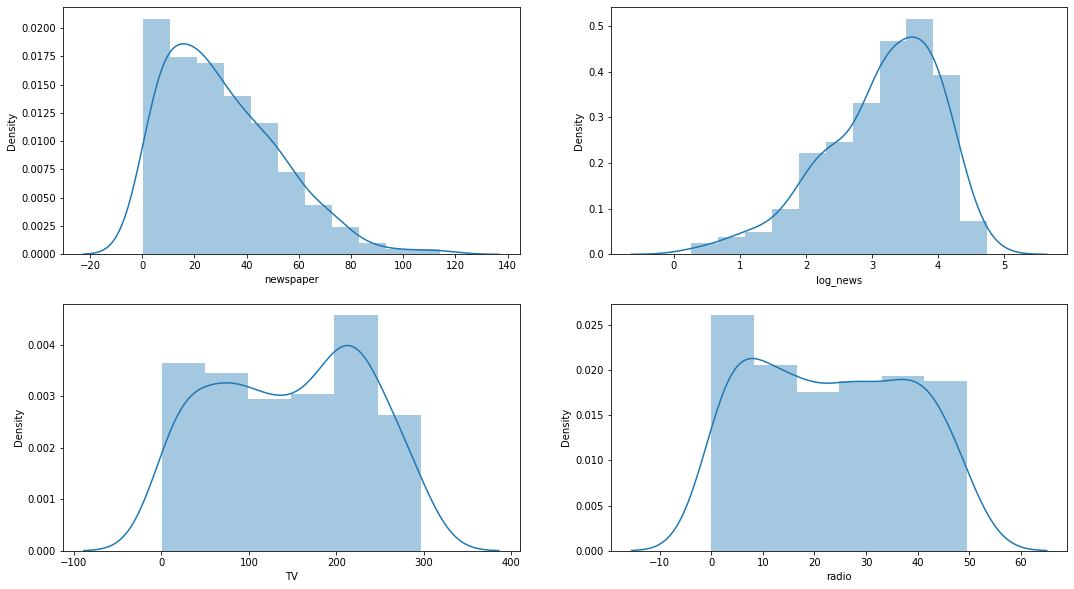

In [ ]:
figure, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2)

# size조절  - inche로
figure.set_size_inches(18,10)

sns.distplot(df['newspaper'],ax =ax1)
sns.distplot(df['log_news'],ax =ax2)
sns.distplot(df['TV'],ax =ax3)
sns.distplot(df['radio'],ax =ax4)
plt.show()

In [ ]:
modela_updated = sm.ols(formula = "sales ~ TV + radio  + log_news",data= df).fit()
print(modela_updated.summary())

# 분석 결과 해보니 --> 정규화를 해줬음에도 p-value가 0.05수준보다 훨씬 크다---> 따라서 수익에 그리 유의미한것이 아니다. 

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.4
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           1.53e-96
Time:                        13:52:16   Log-Likelihood:                -386.15
No. Observations:                 200   AIC:                             780.3
Df Residuals:                     196   BIC:                             793.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8057      0.495      5.671      0.0

# DATA 분석을 통한 우리 제품 광고 MARKETING 결과 VISION 제시 해보기 

## 우리 상품을 팔기위해서는요.... 

* 우선 신문광고는 sales에 큰 영향없다.. --> 중단하고 
* radio와 TV광고에 투자를 더 해야 한다. 
*대신 TV는 상대적으로 비용대비 효과가 떨어지니
 Radio광고에 보다 포커스를 맞추어 marketing 한다면 우리제품의 sales 매출을    늘리는데 기여 할 수 있을 것이다. 